# Biomolecular Interactions

## Physicochemical foundations

In this notebook, we will review some exercises to strengthen your knowledge of the introductory physicochemical foundations' lecture

We will start by reviewing basic binding formulas:

In [1]:
# Import the necessary python libraries
import numpy as np                # for numerical analysis
import matplotlib.pyplot as plt   # For ploting data

### Myoglobin/Oxygen binding - Simple binding

Let's review the myoglobin example:

Myoglobin's major physiological role is to facilitate oxygen diffusion in muscle—the most rapidly respiring tissue under high exertion conditions.

The dissociation constant (K) expresses the characteristic behavior of the binding process. Note that the lower the value of K, the tighter the binding is.

We here employ the binding-sites saturation function to explore how this variable affects the binding.

In [2]:
# Define the O2 binding sites saturation function

def fractionalSaturation(pO2, K=2.8):
    """
    The fraction of O2-binding sites occupied by O2 in myoglobin.
    
    This equation describes a rectangular hyperbola and is identical in form to
    the equations that describe a hormone binding to its cell-surface receptor or a
    small molecular substrate binding to the active site of an enzyme.
    
    Parameters
    ==========
    
    pO2 : np.ndarray or float
        Oxygen pressure (independent variable)
    K : float
        Dissociation constant
    """
    
    YO2 = pO2 / (K + pO2)
    return YO2

Now let's plot this function to understand how binding and saturation works.

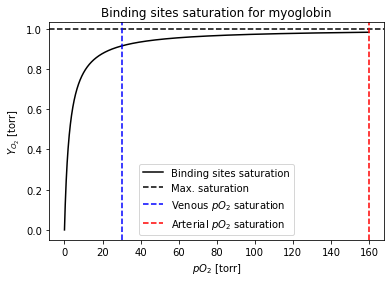

In [3]:
# Define a range of pressures to examine the process
X = np.arange(0, 160, 0.1)

# Plot O2 pressure vs binding sites saturation
Y = fractionalSaturation(X)
plt.plot(X, Y, c='k', label='Binding sites saturation')
plt.xlabel('$pO_{2}$ [torr]')
plt.ylabel('$Y_{O_{2}}$ [torr]')
plt.title('Binding sites saturation for myoglobin')

# Plot the limit when all sites are occupied
plt.axhline(1.0, ls='--', c='k', label='Max. saturation')
# Plot venous saturation pressure
plt.axvline(30, ls='--', c='b', label='Venous $pO_2$ saturation')
# Plot arterial saturation pressure (at sea level)
plt.axvline(160, ls='--', c='r', label='Arterial $pO_2$ saturation')

plt.legend()

At low $pO_2$ , very little $O_2$ binds to myoglobin ( $Y_{O_2}$ is very small). As the $pO_2$ increases, more $O_2$ binds to myoglobin. At very high $pO_2$ , virtually all the $O_2$-binding sites are occupied and myoglobin is said to be saturated with $O_2$.

What is the fraction of oxygen delivered to the muscle by myoglobin in one pulmonary cycle?

To estimate this, we calculate the difference between the saturated fractions of binding sites at the arterial and venous pressures. Then we will use an example myoglobin concentration of 0.69 mM at the muscle fibers. Which volume will occupy this oxygen at standard conditions (assume an ideal gas)?

In [4]:
# Our data
myoG_c = 0.69 # mM
T = 273.15 # in Kelvin
P = 1.0 # in Atm
R = 0.082057 # in L⋅atm/(K⋅mol)

# Estimate the number of mols of O2 liberated
arterial_Y = fractionalSaturation(160)
venous_Y = fractionalSaturation(30)
n = (arterial_Y-venous_Y)*myoG_c*10e-3 # Convert to mol

# Calcualte the volume
V = n*R*T/P * 1000 # convert to mL
print('Myoglobin interchanges a total of %.2f mL in one pulmonary cycle' % V) # in L

Myoglobin interchanges a total of 10.54 mL in one pulmonary cycle


What happens now if the affinity for $O_2$ changed (i.e., the binding constant)

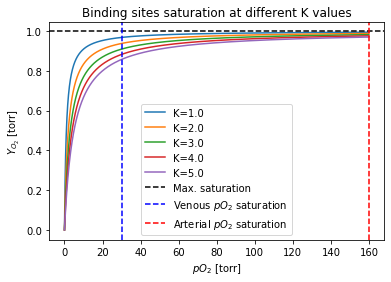

In [5]:
for K in np.arange(1.0, 5.1, 1.0):
    X = np.arange(0, 160, 0.1)
    # Plot O2 pressure vs binding sites saturation
    Y = fractionalSaturation(X, K=K)
    plt.plot(X, Y, label='K='+str(K))
    
plt.xlabel('$pO_{2}$ [torr]')
plt.ylabel('$Y_{O_{2}}$ [torr]')
# Plot the limit when all sites are occupied
plt.axhline(1.0, ls='--', c='k', label='Max. saturation')
# Plot venous saturation pressure
plt.axvline(30, ls='--', c='b', label='Venous $pO_2$ saturation')
# Plot arterial saturation pressure (at sea level)
plt.axvline(160, ls='--', c='r', label='Arterial $pO_2$ saturation')
plt.title('Binding sites saturation at different K values')
plt.legend()

How is the one pulmonary cycle-volume liberated affected by the changes in the binding constant?    

Text(0, 0.5, 'Interchanged $O_2$ Volume [mL]')

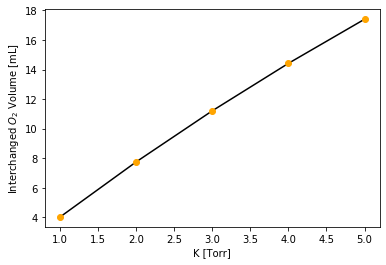

In [6]:
# Data
myoG_c = 0.69 # mM
T = 273.15 # in Kelvin
P = 1.0 # in Atm
R = 0.082057 # in L⋅atm/(K⋅mol)

X = []
Y = []
for K in np.arange(1.0, 5.1, 1.0):
    arterial_Y = fractionalSaturation(160, K=K)
    venous_Y = fractionalSaturation(30, K=K)
    n = (arterial_Y-venous_Y)*myoG_c*10e-3
    V = n*R*T/P*1000
    X.append(K)
    Y.append(V)
    
plt.plot(X,Y, c='k')
plt.plot(X,Y, c='orange', marker='o', ls='')
plt.xlabel('K [Torr]')
plt.ylabel('Interchanged $O_2$ Volume [mL]')

There is a linear dependency between the interchanged volume and the binding constant.

### Hemoglobin/Oxygen binding - Allosteric binding

The earliest attempt to analyze hemoglobin’s sigmoidal $O_2$ dissociation curve was formulated by Archibald Hill in 1910. Hill assumed that hemoglobin (Hb) bound n molecules of $O_2$ in a single step:

$Hb + nO_2 \rightarrow Hb(O_2)_n$
        
That is, with infinite cooperativity.

The Hill equation describes hemoglobin’s $O_2$-binding curve:

$Y_{O_2} = \frac{(p_{O_2})^n}{K^n + (p_{O_2})^n}$

The quantity n, the Hill constant, increases with the degree of cooperativity of a reaction and provides a convenient, although simplistic, characterization of a ligand-binding reaction. The coefficient n may be taken to be a nonintegral parameter related to the degree of cooperativity among interacting hemoglobin subunits rather than the number of subunits that bind $O_2$ in one step.

Infinite $O_2$ binding cooperativity, as Hill assumed, is a physical impossibility. The Hill equation can then be taken as a useful empirical curve-fitting relationship rather than an indicator of a particular ligand-binding model.

How does n affect $O_2$ binding?

In [7]:
def hillEquation(pO2, n=1.0, K=30):
    """
    The fraction of O2-binding sites occupied by O2 in hemoglobin using the Hill equation.
    
    Parameters
    ==========
    
    pO2 : np.ndarray or float
        Oxygen pressure (independent variable)
    n : float
        Hill coefficient
    K : float
        Dissociation constant
    """
    
    YO2 = pO2**n / (K**n + pO2**n)
    
    return YO2

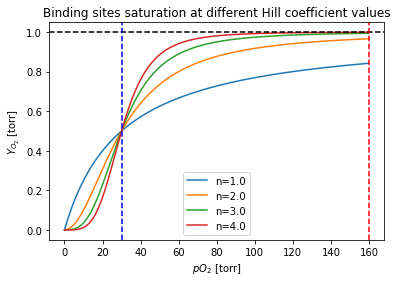

In [8]:
for n in np.arange(1.0, 4.1):
    X = np.arange(0, 160, 0.1)
    # Plot O2 pressure vs binding sites saturation
    Y = hillEquation(X, n=n)
    plt.plot(X, Y, label='n='+str(n))
    
plt.xlabel('$pO_{2}$ [torr]')
plt.ylabel('$Y_{O_{2}}$ [torr]')
# Plot the limit when all sites are occupied
plt.axhline(1.0, ls='--', c='k')
# Plot venous saturation pressure
plt.axvline(30, ls='--', c='b')
# Plot arterial saturation pressure (at sea level)
plt.axvline(160, ls='--', c='r')
plt.title('Binding sites saturation at different Hill coefficient values')
plt.legend()

How will the fraction of volume liberated will be affected by the coperativity?

Text(0, 0.5, '$O_2$ interchanged fraction')

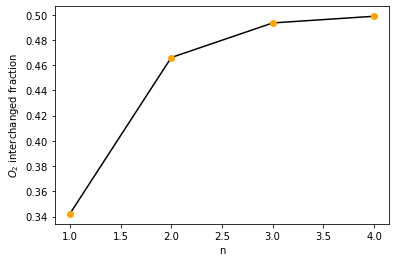

In [9]:
X = []
Y = []

for n in np.arange(1.0, 4.1, 1.0):
    X.append(n)
    arterial_Y = hillEquation(160, n=n)
    venous_Y = hillEquation(30, n=n)
    fO2 = arterial_Y-venous_Y
    Y.append(fO2)
    
plt.plot(X,Y, c='k')
plt.plot(X,Y, c='orange', marker='o', ls='')
plt.xlabel('n')
plt.ylabel('$O_2$ interchanged fraction')

How will the fraction of liberated volume be affected by the cooperativity?

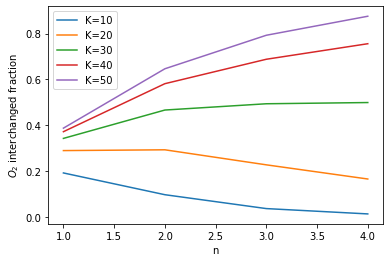

In [10]:
for K in np.arange(10, 51, 10):
    X = []
    Y = []
    for n in np.arange(1.0, 4.1, 1.0):
        X.append(n)
        arterial_Y = hillEquation(160, n=n, K=K)
        venous_Y = hillEquation(30, n=n, K=K)
        fO2 = arterial_Y-venous_Y
        Y.append(fO2)

    plt.plot(X,Y, label='K='+str(K))
    plt.xlabel('n')
    plt.ylabel('$O_2$ interchanged fraction')
plt.legend()

How do the different cooperative binding curves look like at the different affinities?

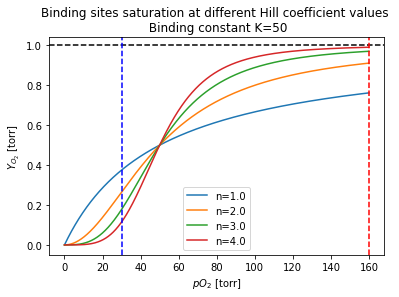

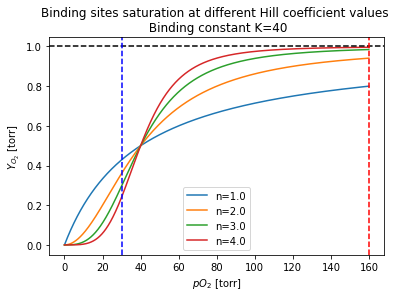

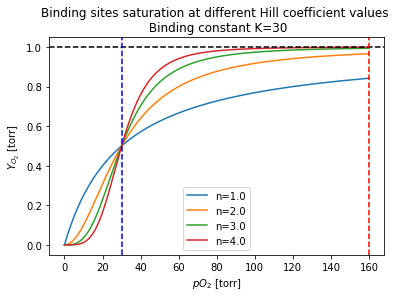

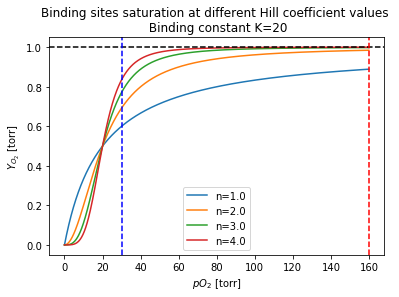

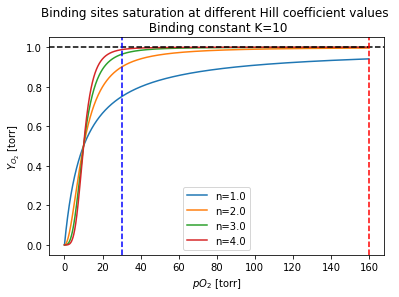

In [11]:
for K in np.arange(50, 9, -10):
    plt.figure()
    for n in np.arange(1.0, 4.1):
        X = np.arange(0, 160, 0.1)
        # Plot O2 pressure vs binding sites saturation
        Y = hillEquation(X, n=n, K=K)
        plt.plot(X, Y, label='n='+str(n))

    plt.xlabel('$pO_{2}$ [torr]')
    plt.ylabel('$Y_{O_{2}}$ [torr]')
    # Plot the limit when all sites are occupied
    plt.axhline(1.0, ls='--', c='k')
    # Plot venous saturation pressure
    plt.axvline(30, ls='--', c='b')
    # Plot arterial saturation pressure (at sea level)
    plt.axvline(160, ls='--', c='r')
    plt.title('Binding sites saturation at different Hill coefficient values \n Binding constant K='+str(K))
    plt.legend()

Why do you think hemoglobin does not increment its binding constant (less affinity) for $O_2$ to maximize the fraction of $O_2$ interchanged?

### References 

Voet, Donald, Judith G. Voet, and Charlotte W. Pratt. Fundamentals of biochemistry: life at the molecular level. John Wiley & Sons, 2016.